## Homework: ## 

### Read the superchargers.csv found in the /class/datasets folder. It has simply two columns a lat and lng representing the location of Tesla superchargers in a few cities. Run a cluster analysis to determine what are the natural number of clusters and plot that and determine the centroids of the clusters.

<details><summary>Click for <b>hint</b></summary>
<p>
Remember to import all the correct libraries. Sometimes just figuring that out is half the battle.
<br>
Copy the plot_cluster and silhouette_plot helper functions to make it easier
<br>
<br>
</p>
</details>


<details><summary>Click for <b>code</b></summary>
<p>

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans

```
</p>
</details>

In [2]:
!ls ../datasets

finance           northwind         text
finance copy      superchargers.csv


In [5]:
!cat ../datasets/superchargers.csv

lat,lng
33.679646, -117.174095
28.331356, -81.532453
37.413353, -121.897995
37.525905, -122.006624
37.919969, -122.348976
38.730606, -120.788085
39.250765, -119.948927
36.916349, -121.773512
34.441994, -119.258898
36.11671, -115.168258
39.689269, -123.483443
27.7915, -82.332833
28.553648, -81.205429
29.624756, -82.376597
25.764706, -80.194629
36.168897, -115.286579



In [9]:
%matplotlib inline

def silhouette_plot(data, count = 6):
   from sklearn.datasets import make_blobs
   from sklearn.cluster import KMeans
   from sklearn.metrics import silhouette_samples, silhouette_score

   import matplotlib.pyplot as plt
   import matplotlib.cm as cm
   import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)  # For reproducibility

   range_n_clusters = range(2, count + 1)

   for n_clusters in range_n_clusters:
       # Create a subplot with 1 row and 2 columns
       fig, (ax1, ax2) = plt.subplots(1, 2)
       fig.set_size_inches(18, 7)

       # The 1st subplot is the silhouette plot
       # The silhouette coefficient can range from -1, 1 but in this example all
       # lie within [-0.1, 1]
       ax1.set_xlim([-0.1, 1])
       # The (n_clusters+1)*10 is for inserting blank space between silhouette
       # plots of individual clusters, to demarcate them clearly.
       ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

       # Initialize the clusterer with n_clusters value and a random generator
       # seed of 10 for reproducibility.
       clusterer = KMeans(n_clusters=n_clusters, random_state=10)
       cluster_labels = clusterer.fit_predict(data)

       # The silhouette_score gives the average value for all the samples.
       # This gives a perspective into the density and separation of the formed
       # clusters
       silhouette_avg = silhouette_score(data, cluster_labels)
       print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

       # Compute the silhouette scores for each sample
       sample_silhouette_values = silhouette_samples(data, cluster_labels)

       y_lower = 10
       for i in range(n_clusters):
           # Aggregate the silhouette scores for samples belonging to
           # cluster i, and sort them
           ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

           ith_cluster_silhouette_values.sort()

           size_cluster_i = ith_cluster_silhouette_values.shape[0]
           y_upper = y_lower + size_cluster_i

           color = cm.nipy_spectral(float(i) / n_clusters)
           ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

           # Label the silhouette plots with their cluster numbers at the middle
           ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

           # Compute the new y_lower for next plot
           y_lower = y_upper + 10  # 10 for the 0 samples

       ax1.set_title("The silhouette plot for the various clusters.")
       ax1.set_xlabel("The silhouette coefficient values")
       ax1.set_ylabel("Cluster label")

       # The vertical line for average silhouette score of all the values
       ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

       ax1.set_yticks([])  # Clear the yaxis labels / ticks
       ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

       # 2nd Plot showing the actual clusters formed
       colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
       ax2.scatter(data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

       # Labeling the clusters
       centers = clusterer.cluster_centers_
       # Draw white circles at cluster centers
       ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

       for i, c in enumerate(centers):
           ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

       ax2.set_title("The visualization of the clustered data.")
       ax2.set_xlabel("Feature space for the 1st feature")
       ax2.set_ylabel("Feature space for the 2nd feature")

       plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

   plt.show()



In [7]:
import pandas as pd
tesla = pd.read_csv('../datasets/superchargers.csv', header=0)
print(tesla.columns, tesla.count())
tesla2 = tesla.loc[:,['lat', 'lng']].values
display(tesla2)


Index(['lat', 'lng'], dtype='object') lat    16
lng    16
dtype: int64


array([[  33.679646, -117.174095],
       [  28.331356,  -81.532453],
       [  37.413353, -121.897995],
       [  37.525905, -122.006624],
       [  37.919969, -122.348976],
       [  38.730606, -120.788085],
       [  39.250765, -119.948927],
       [  36.916349, -121.773512],
       [  34.441994, -119.258898],
       [  36.11671 , -115.168258],
       [  39.689269, -123.483443],
       [  27.7915  ,  -82.332833],
       [  28.553648,  -81.205429],
       [  29.624756,  -82.376597],
       [  25.764706,  -80.194629],
       [  36.168897, -115.286579]])

For n_clusters = 2 The average silhouette_score is : 0.9084969409836849
For n_clusters = 3 The average silhouette_score is : 0.7251570710417636
For n_clusters = 4 The average silhouette_score is : 0.7517762962790919
For n_clusters = 5 The average silhouette_score is : 0.6109043676221797
For n_clusters = 6 The average silhouette_score is : 0.5333285298051467


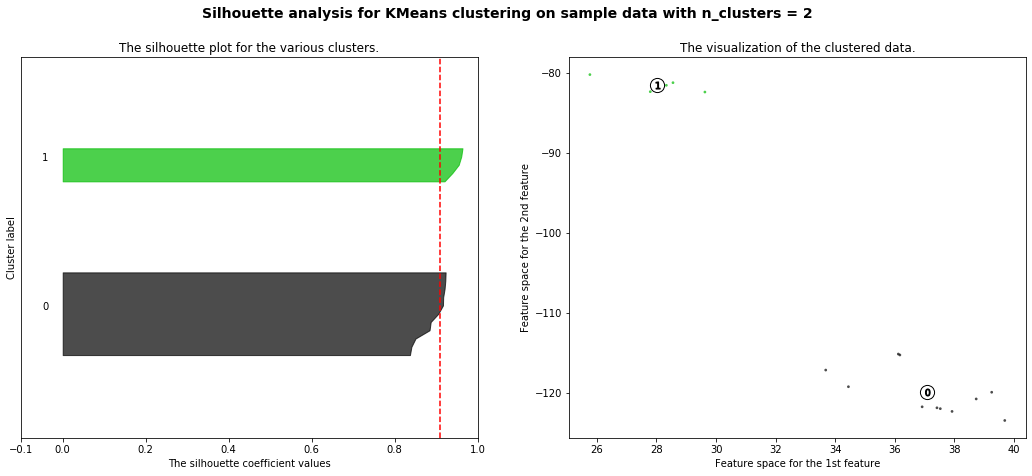

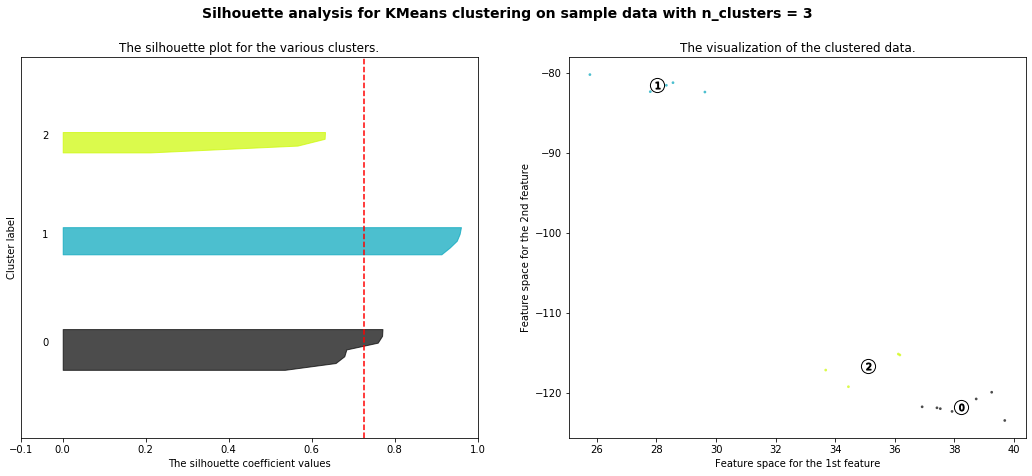

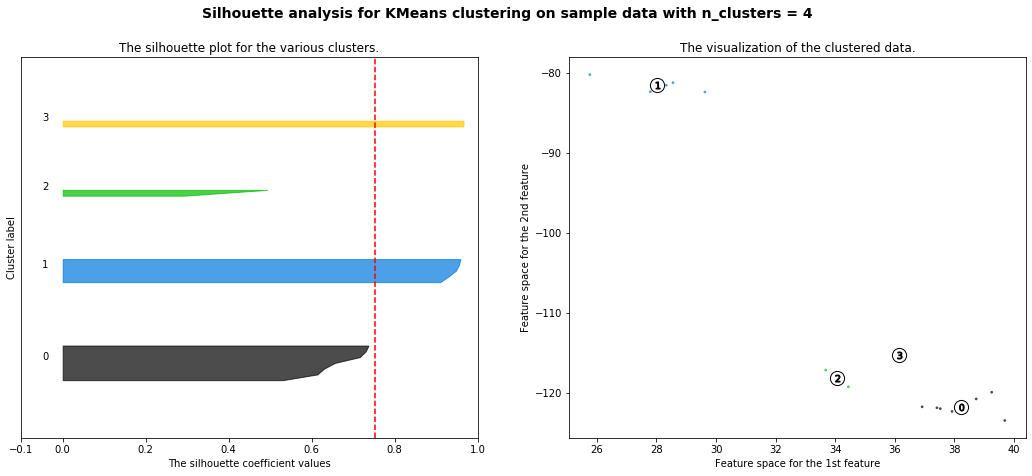

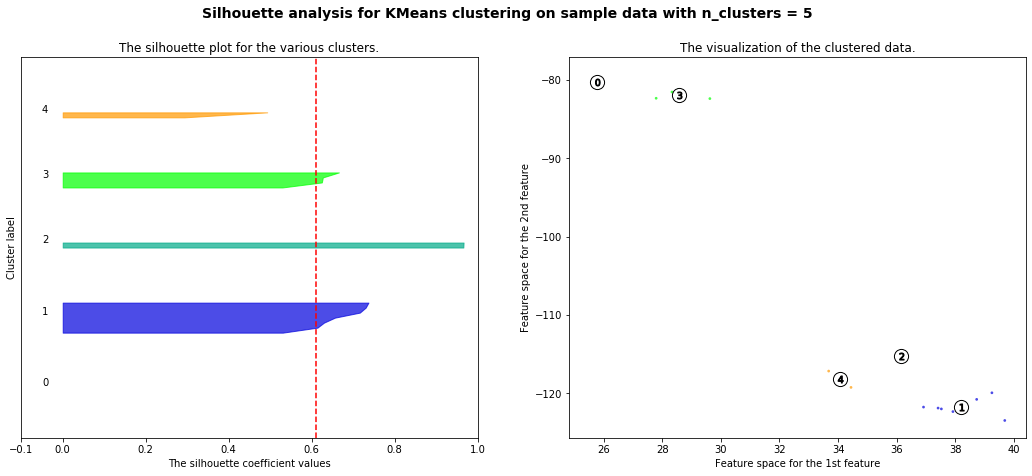

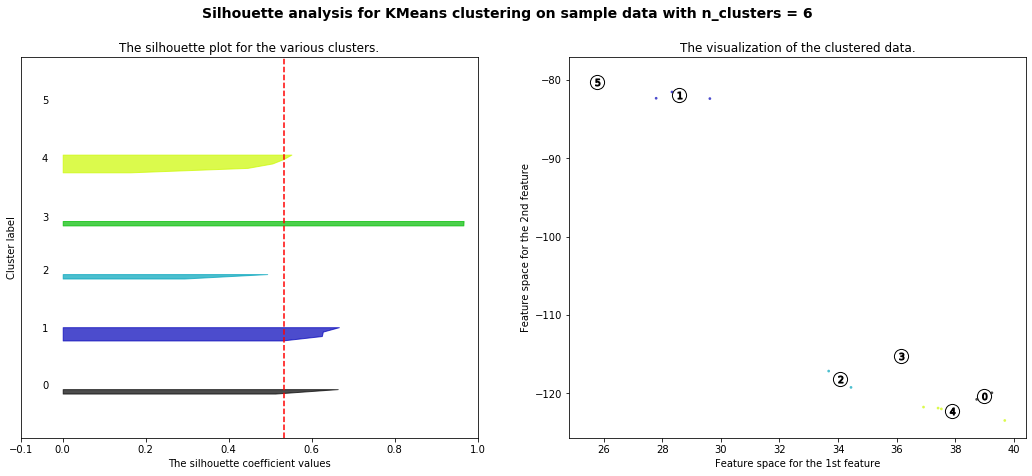

In [8]:
silhouette_plot(tesla2, 6)


#### Looking at the above silhouette plots, we can definitely tell that most in the first plot (with two clusters) are the only ones satisfying the condition of being above the mean silhouette line. Hence we can deduce that the sample has at best just two clusters 

This is also evident from the silhouette scores, with the score being the highest for two clusters


### Now we just try to visualize the data first

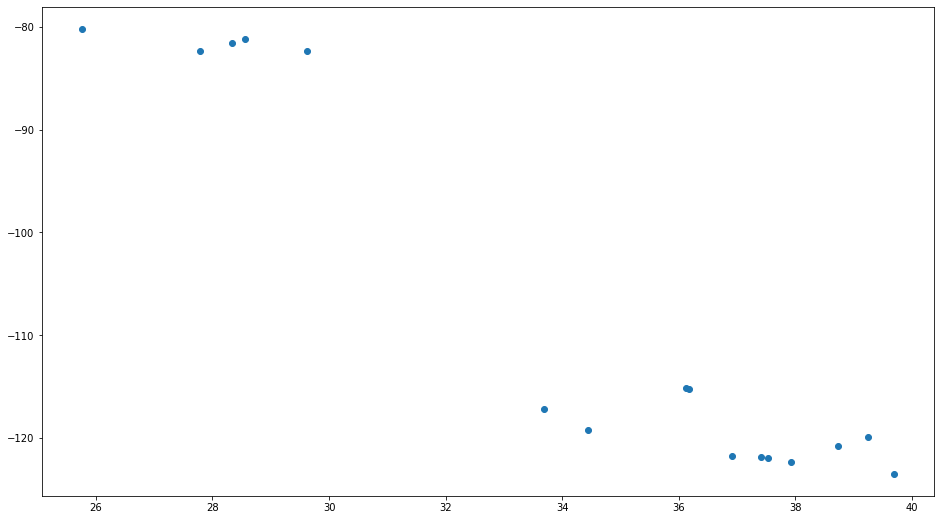

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(tesla2[:,0],tesla2[:,1],'o')
plt.show()

#### We can see from the above, that the 16 supercharger stations are all centered around two clusters 

#### We also draw an elbow graph to show that the score exponentially rises until 2 clusters, and then plateaus after that

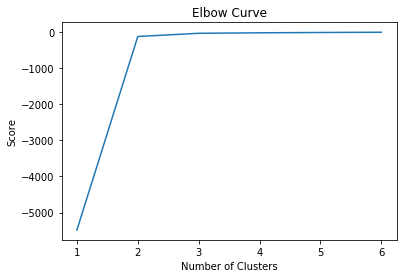

In [12]:
from sklearn import cluster
%matplotlib inline
import matplotlib.pyplot as plt


def plot_elbow(data, cluster_cnt = 6):
   CLUSTERS = range(1, cluster_cnt + 1)
   kmeans = [cluster.KMeans(n_clusters=i) for i in CLUSTERS]

   score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
   #print(score)
   plt.plot(CLUSTERS ,score)
   plt.xlabel('Number of Clusters')
   plt.ylabel('Score')
   plt.title('Elbow Curve')
   plt.xticks(np.arange(1, cluster_cnt + 1, 1))
   plt.show()

plot_elbow(tesla2)

### Finally we plot using the cluster analysis result 

False
True
[1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1]
[[  28.0131932   -81.5283882 ]
 [  37.07758755 -119.92139927]]


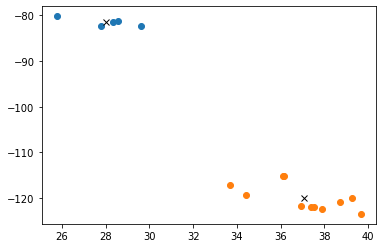

In [18]:
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster
CLUSTERS = 2

k_means = cluster.KMeans(n_clusters=CLUSTERS, random_state = 12) #KMeans is not a function - but a class. 

print('labels_' in dir(k_means)) #this _ var tells python that the var is not created yet. Fit() method is responsible for generating this variable.
                                 #this is confirming if labels_ is present in k_means object or not
k_means.fit(tesla2) #this is going thru training process
print('labels_' in dir(k_means))
print(k_means.labels_)
print(k_means.cluster_centers_)

def plot_cluster(model, data, clusters):
    labels = model.labels_
    centroids = model.cluster_centers_
    
    for i in range(clusters):
        ds = data[np.where(labels==i)]
        # plot the data observations
        plt.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.show()

plot_cluster(k_means, tesla2, CLUSTERS)